In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def create_results(filename):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filename)
    
    return df

In [33]:
def plot_cyclegg_results(df):
    # Filter rows with "Valid" result
    valid_results = df[df['result'] == 'Valid']

    # Create time_range variable
    time_range = np.arange(0, 10.1 * 1000, 0.1 * 1000)  # Range from 0 to 300 seconds in 100ms increments
    
    # Initialize num_valid_at_time variable
    num_valid_at_time = []
    
    # Iterate over time_range and count the number of valid results for each time step
    for t in time_range:
        num_valid = valid_results[valid_results['time'] <= t].shape[0]
        num_valid_at_time.append(num_valid)
    
    # Plot 1: time versus name for Valid results
    plt.figure(figsize=(8, 6))
    plt.scatter(time_range, num_valid_at_time)
    plt.xlabel('Time (ms)')
    plt.ylabel('Count')
    plt.title('Time versus count for Valid Results')
    plt.show()
    
    # Plot 2: num_lemmas_attempted versus name for all rows
    plt.figure(figsize=(8, 6))
    plt.scatter(df['name'],df['num_lemmas_attempted'])
    plt.xlabel('Name')
    plt.ylabel('Number of Lemmas Attempted')
    plt.title('Number of Lemmas Attempted versus Name')
    plt.gca().axes.get_xaxis().set_visible(False)  # Hide the name axis
    plt.show()

In [50]:
def filter_clam_results(clam_results, name_column, name_prefix, results_to_keep):
    '''
    Filters a dataframe containing clam results to only those
    that require lemmas.
    '''
    # Create a new list result_names by prepending name_prefix to results_to_keep
    result_names = [name_prefix + str(result) for result in results_to_keep]

    # Filter clam_results to keep only results where name_column is contained in results_to_keep
    filtered_results = clam_results[clam_results[name_column].isin(result_names)]

    # for result in result_names:
    #     if not any(result == clam_results[name_column]):
    #         print(result)
    assert(len(filtered_results) == 50)

    return filtered_results

In [51]:
# Range from 1 to 35 inclusive
range1 = map(str, range(1, 36))
# Handle the case where there's a prefix 0 (hacky, I know)
range_single_digit = map(lambda x: '0' + str(x), range(1,10))
# Range from 48 to 50 inclusive
range2 = map(str, range(48, 51))
# Range from 75 to 86 inclusive
range3 = map(str, range(75, 87))

# Combine all ranges
clam_lemma_props = list(range_single_digit) + list(range1) + list(range2) + list(range3)
len(clam_lemma_props)

59

In [52]:
cyclegg_results_clam = create_results("./results-clam-5s.csv")
cyclegg_results_clam_lemma_props = filter_clam_results(cyclegg_results_clam, 'name', 'clam_', clam_lemma_props)

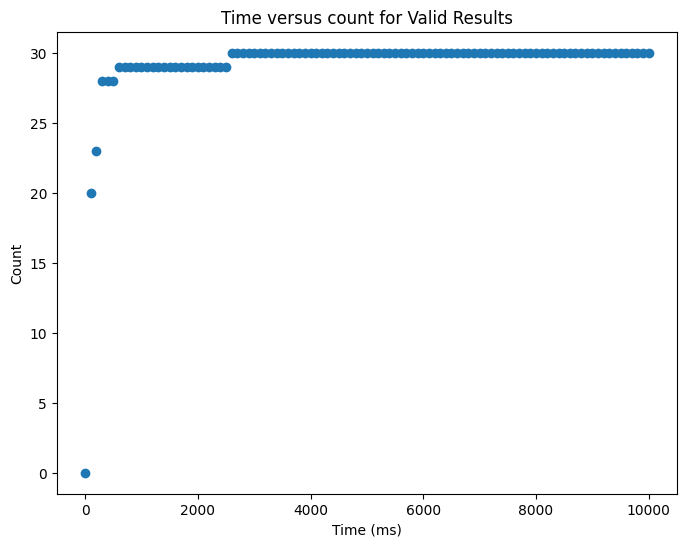

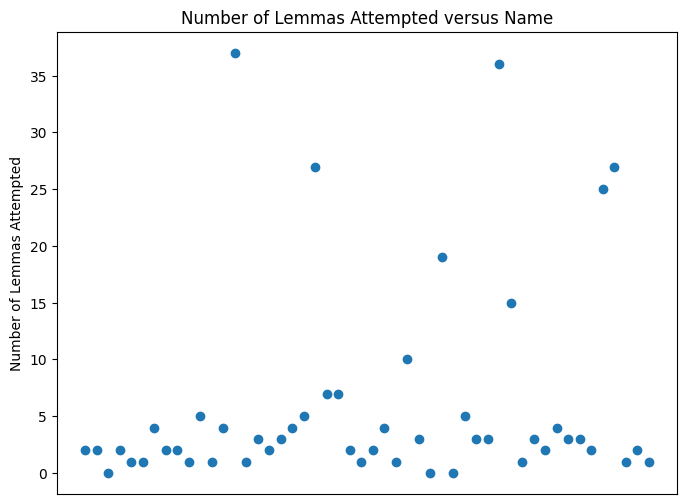

In [53]:
plot_cyclegg_results(cyclegg_results_clam_lemma_props)